# Stages of Data Science
#### 1) Data Collection
#### 2) Exploratory Data Analysis (visual and Descriptive)
#### 3) Feature Engineering (Data Preprocessing)
#### 4) Model Creation and Evaluation
#### 5) Model Deployment

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from pandas_profiling import ProfileReport
from sklearn.preprocessing import (LabelEncoder,OneHotEncoder,MaxAbsScaler)

from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

C:\Users\Yash Mayur\AppData\Local\Temp\ipykernel_12308\1597575372.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# 1) Data Collection

In [40]:
df = pd.read_csv('ai4i2020.csv')
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


## Feature Description

#### 1)product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.

#### 2) Type: just the product type L, M or H from column 2.

#### 3) Air Temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.

#### 4) Process Temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

#### 5) Rotational Speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.

#### 6) Torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values. 
#### 7) Tool Wear [min]: (breakdown and gradual failure of a cutting tool due to regular operation) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

#### 8) A 'Machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true. The machine failure consists of five independent failure modes as follows:

##### a) Tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

##### b) Heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

##### c) Power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

##### d) Overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

##### e) Random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

### Note: If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

# 2) Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

### Acronyms to be considered:
##### [K]: kelvin
##### [rpm]: revolutions per minute
##### [Nm]: newton-meter
##### [min]: minutes

In [42]:
# let's find the null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

##### No null values present

In [43]:
# Let's get some description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [44]:
# Let's convert int datatype to float for preprocessing purposes

for feature in df.columns:
    if df[feature].dtype != 'O':
        df[feature] = df[feature].astype(float)
        

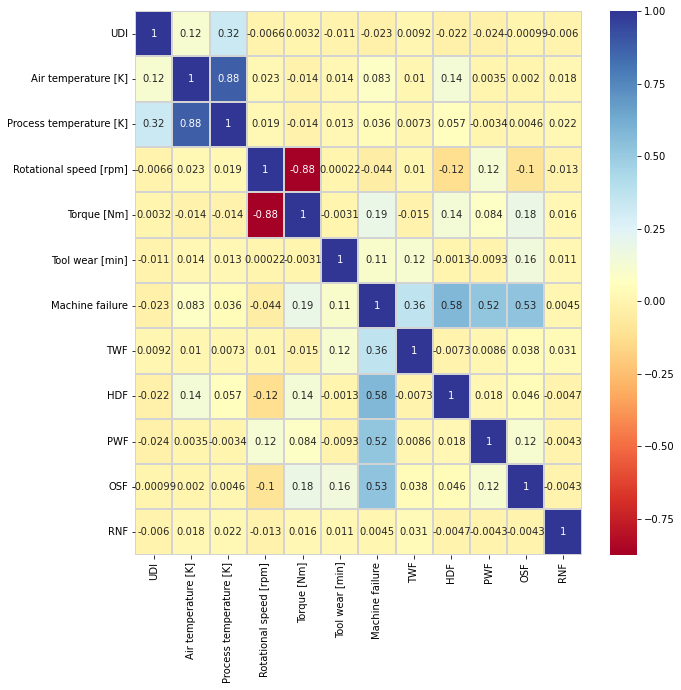

In [45]:
# Let's find the correlation of features with each other

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            cmap='RdYlBu',
            annot=True,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

### We can see that there are strongly correlated features namely process temperature and air temperature. Torque and rotational speed are also negatively correlated. We can drop one of the temperatures, but the torque to rotational speed difference might be a indication of a failure, so we'll keep both.

# So now we will drop some columns which is not usefull

#### dropping the indices and product id

In [46]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

#### Drop the failure modes, as currently we are only interested whether something is failed or not.

In [47]:
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

#### Let's check balanced relation of the independent features with thetarget feature

In [48]:
df_group = df.groupby(['Machine failure'])
df_group.count()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,,
0.0,9661,9661,9661,9661,9661,9661
1.0,339,339,339,339,339,339


### The above table clearly shows that the dataset is imbalanced

# Let's derive a power attribute using this formula:

Power = Torque × Rotational speed

<AxesSubplot:xlabel='Power', ylabel='Count'>

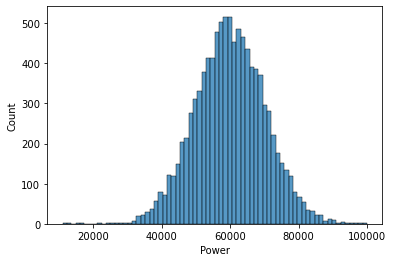

In [49]:
df['Power'] = df[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)
sns.histplot(df['Power'])

#### We get gaussian normal distribution for the power feature

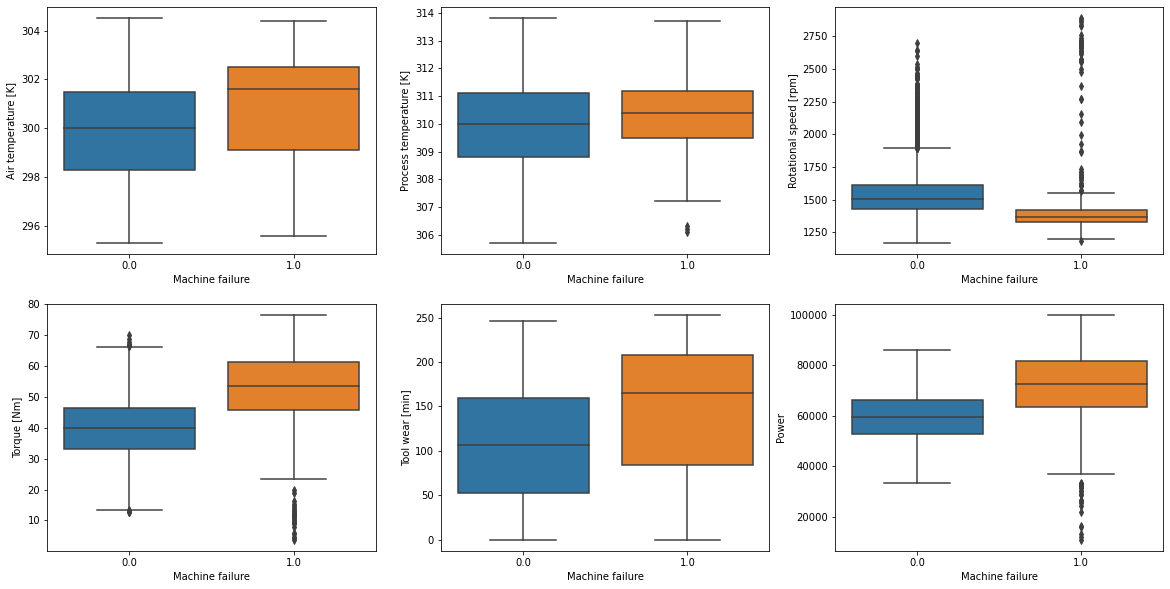

In [50]:
## Boxplot

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
i=0
for _, col in enumerate(df.columns):
    if col == "Machine failure":
        continue
    elif col == "Type":
        continue
    else:
        sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i//3][i%3])
        i += 1

# 3) Descriptive Analysis

### Clustering

In [51]:
# features to use for clustering
feature_list = [feature for feature in df.columns if df[feature].dtype == 'float64']
X = df[feature_list]
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init='random',  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

df["kmeans_cluster"] = kmeans.predict(X)

<Figure size 720x576 with 0 Axes>

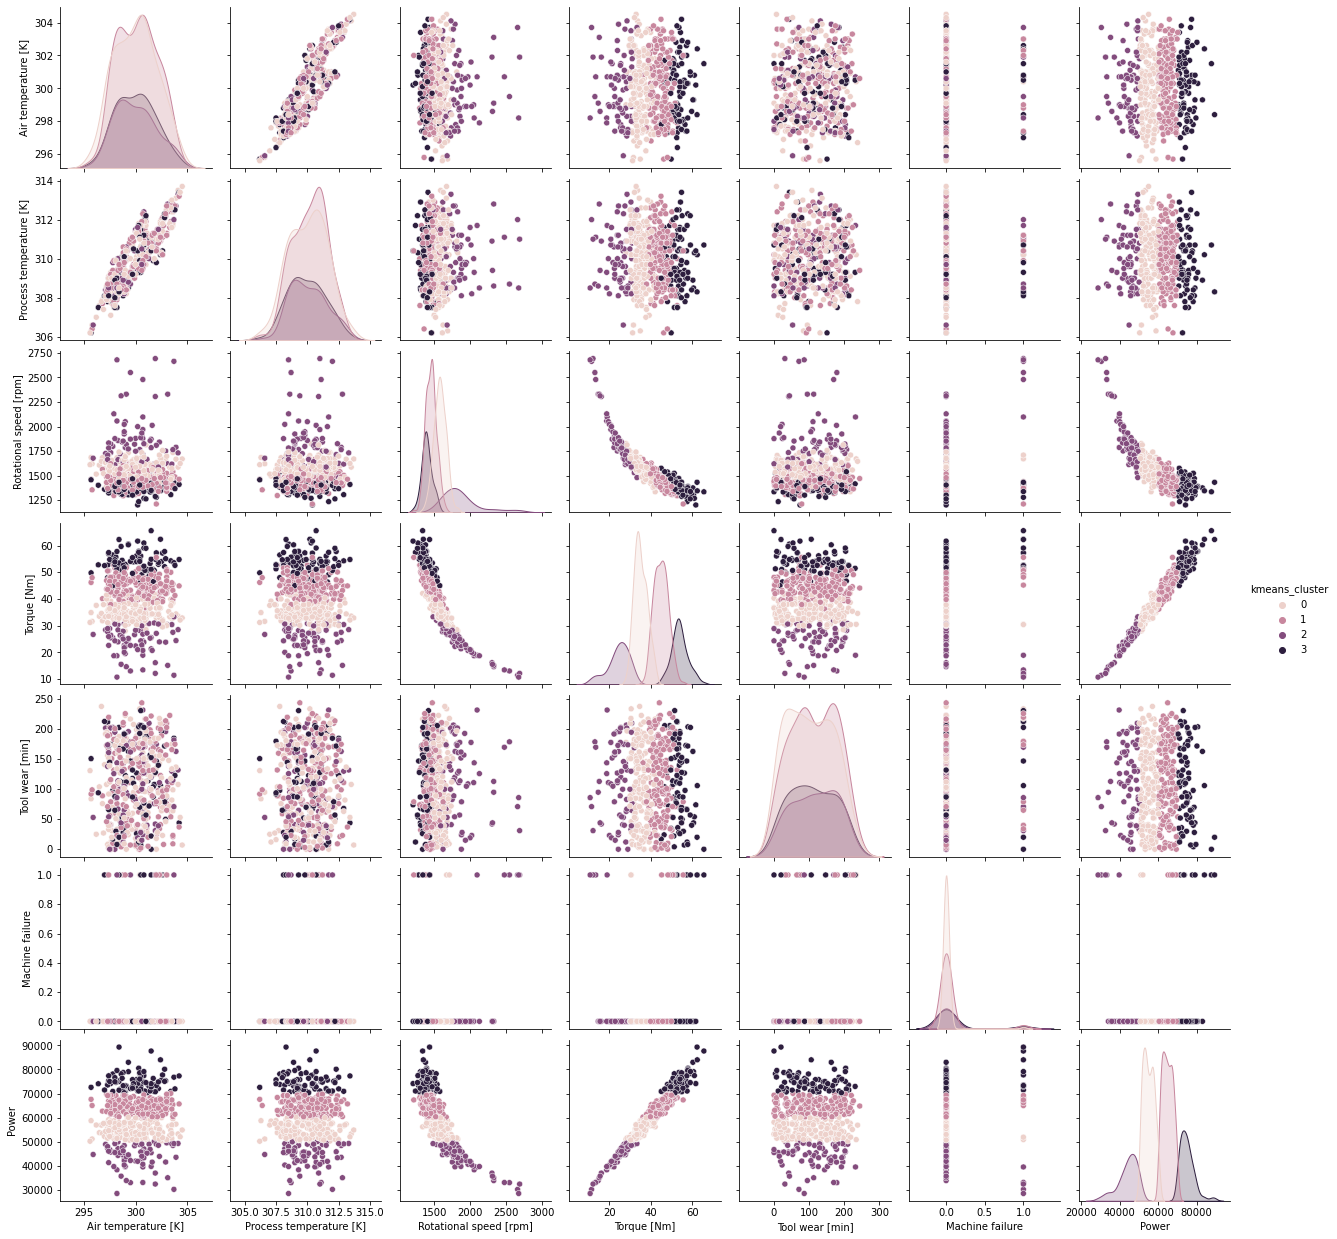

In [52]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=feature_list)
plt.show()

## From the above results we can clearly observe
##### Process Temperature and Air Temperature have Linear Relationship with each other and both the data has gaussian normal distribution

In [53]:
# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score}")

Silhouette Coefficient: 0.5191499897517547


### We can say that the clusters are well apart from each other as the silhouette score is closer to 1.

In [33]:
## Let's convert the dataframe which can be used further in our project

os.makedirs(os.getcwd(),exist_ok=True)
df.to_csv("data.csv",header=True,index=False)

# 4) Feature Engineering (Data Pre-processing) and Feature Selection

### Encoding of Categorical Feature i.e. Type
Use any one only

1) Label Encoding or 2) One Hot Encoding

In [17]:
## Label Encoding

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,kmeans_cluster
0,2,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8,1
1,1,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4,1
2,1,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2,3
3,1,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5,0
4,1,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0,0


In [54]:
# One Hot Encoding

frame = pd.get_dummies(data=df['Type'],drop_first=True)
df.drop(columns='Type',axis=1,inplace=True)
df['L'] = frame['L']
df['M'] = frame['M']
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,kmeans_cluster,L,M
0,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8,1,0,1
1,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4,1,1,0
2,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2,3,1,0
3,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5,0,1,0
4,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0,0,1,0


In [55]:
X = df.drop(columns=['Machine failure','kmeans_cluster'],axis=1)
y = df['Machine failure']
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,L,M
0,298.1,308.6,1551.0,42.8,0.0,66382.8,0,1
1,298.2,308.7,1408.0,46.3,3.0,65190.4,1,0
2,298.1,308.5,1498.0,49.4,5.0,74001.2,1,0
3,298.2,308.6,1433.0,39.5,7.0,56603.5,1,0
4,298.2,308.7,1408.0,40.0,9.0,56320.0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,47318.0,0,1
9996,298.9,308.4,1632.0,31.8,17.0,51897.6,0,0
9997,299.0,308.6,1645.0,33.4,22.0,54943.0,0,1
9998,299.0,308.7,1408.0,48.5,25.0,68288.0,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_test.shape

(2500, 8)

### As analysed and Mentioned earlier that the dataset is imbalanced so we have to use SMOTE technique on training data inorder to make balance data

In [60]:
oversample = SVMSMOTE(random_state = 42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [61]:
scale = MaxAbsScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# 5) Model Creation and Evaluation

### a) Logistic Regression

In [62]:
# Logistic Regression

model_dict = dict()

model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test) # These are the predictions from the test data.
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Logistic Regression":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 88.24%
Recall: 88.24%
Precision: 96.59%
F1-Score: 91.65%
ROC AUC score: 86.40%
Confusion Matrix: 



array([[2156,  272],
       [  22,   50]], dtype=int64)

### b) Decision Tree

In [64]:
# Decision Tree

model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Decision Tree":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 96.20%
Recall: 96.20%
Precision: 97.35%
F1-Score: 96.66%
ROC AUC score: 82.55%
Confusion Matrix: 



array([[2356,   72],
       [  23,   49]], dtype=int64)

### c) Random Forest Classifier

In [66]:
# Random Forest Classifier

model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=42,bootstrap=True,).fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Random Forest Classifier":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 97.64%
Recall: 97.64%
Precision: 98.07%
F1-Score: 97.81%
ROC AUC score: 96.88%
Confusion Matrix: 



array([[2386,   42],
       [  17,   55]], dtype=int64)

### d) Gradient Boosting classifier

In [68]:
model = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [69]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Gradient Boosting":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 96.80%
Recall: 96.80%
Precision: 97.98%
F1-Score: 97.23%
ROC AUC score: 97.07%
Confusion Matrix: 



array([[2360,   68],
       [  12,   60]], dtype=int64)

### e) K Neighbors Classifier

In [70]:
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"KNN Classifier":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 94.96%
Recall: 94.96%
Precision: 97.19%
F1-Score: 95.84%
ROC AUC score: 85.81%
Confusion Matrix: 



array([[2323,  105],
       [  21,   51]], dtype=int64)

### f) Gaussian Naive Bayes Classifier

In [72]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Gaussian Naive Bayes":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 88.56%
Recall: 88.56%
Precision: 96.60%
F1-Score: 91.85%
ROC AUC score: 88.84%
Confusion Matrix: 



array([[2164,  264],
       [  22,   50]], dtype=int64)

### g) Cat Boost Classifier

In [74]:
model = CatBoostClassifier(verbose = False).fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Catboost Classifier":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 97.96%
Recall: 97.96%
Precision: 98.28%
F1-Score: 98.09%
ROC AUC score: 97.07%
Confusion Matrix: 



array([[2392,   36],
       [  15,   57]], dtype=int64)

### h) Nueral Network MLP Classifier

In [76]:
model = MLPClassifier(hidden_layer_sizes = (100,100,), activation='relu', solver='adam', batch_size=2000,verbose=0).fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Yash Mayur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')
confusion_mat = confusion_matrix(y_test,y_pred)

model_dict.update({"Nueral Network Classifier":accuracy})
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("Confusion Matrix: \n")
confusion_mat

Accuracy: 88.04%
Recall: 88.04%
Precision: 96.73%
F1-Score: 91.55%
ROC AUC score: 91.51%
Confusion Matrix: 



array([[2148,  280],
       [  19,   53]], dtype=int64)

# 6) Best Model to use

In [78]:
sorted_dict = dict(sorted(model_dict.items(),key=lambda x:x[1],reverse=True))
Model_name = list(sorted_dict.keys())[0]
Model_accuracy = list(sorted_dict.values())[0]

sent = "The Best Model is {0} and its accuracy is {1}".format(Model_name,Model_accuracy*100)
print(sent)

The Best Model is Catboost Classifier and its accuracy is 97.96000000000001


# 7) Quick Data Analysis Report

In [ ]:
dataframe = pd.read_csv('ai4i2020.csv')
Report = ProfileReport(dataframe,explorative=True)
Report

In [ ]:
Report.to_file("Data_Analysis_Report.pdf")